In [6]:
from pyPolCal.fitting import calc_s_res_global
from pyPolCal.constants import wavelength_bins
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# calculate s_abs with on sky fitted model
offset_imr = 0.00637# derotator offset
offset_hwp = -0.03303# HWP offset
offset_cal = -0.01506 # calibration polarizer offset
m1 = 2.178
m2 = 2.251
b1 = 13.34
b2 = 12.47
m3_off = -30.3
system_dict = {
    "components" : {
        "wollaston" : {
        "type" : "CHARIS_wollaston_function",
        "properties" : {"wavelength": 500, "beam": 'o'}, 
        "tag": "internal",
        },
        "image_rotator" : {
            "type" : "elliptical_IMR_function",
            "properties" : {"wavelength": 1000, "theta": 0, "delta_theta": offset_imr},
            "tag": "internal",
        },
        "hwp" : {
            "type" : "two_layer_HWP_function",
            "properties" : {"wavelength":1000, "w_SiO2":1.638, "w_MgF2":1.28,"theta": 0, "delta_theta": offset_hwp},
            "tag": "internal",
        },
        "altitude_rot" : {
            "type" : "rotator_function",
            "properties" : {"pa":0},
            "tag":"internal",
        },
        "M3" : {
            "type" : "SUBARU_M3_function",
            "properties" : {"wavelength":1000, "m1":m1, "m2":m2, "b1":b1, "b2":b2, "delta_theta":m3_off},
            "tag": "internal",
        },

        "parang_rot" : {        
            "type" : "rotator_function",
            "properties" : {"pa":0},
            "tag":"internal",
        },
}}
# p0 dict is redundant here but is necessary because of old code artifacts
p0_dict = {
    'hwp': {
        'delta_theta': offset_hwp}
    }

In [3]:
csvdir = Path('../datacsvs/onsky_nbs/HD10166_and_HD293396/')
s_res = calc_s_res_global(csvdir, system_dict, p0_dict, number_of_fitted_params=0, m3=True)

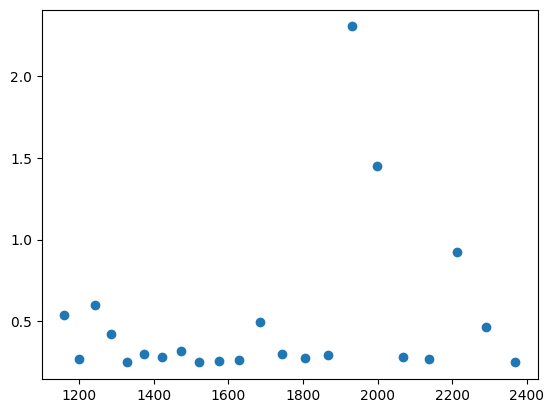

In [4]:
plt.scatter(wavelength_bins, s_res)

In [8]:
# calculate s_rel with internal polarized cals
wsio2 = 1.638
wmgf2 = 1.28
offset_imr = 0.00637# derotator offset
offset_hwp = -0.03303# HWP offset
offset_cal = -0.01506 # calibration polarizer offset
wavelength_bin = 9
# Define instrument configuration as system dictionary
# Wollaston beam, imr theta/phi, and hwp theta/phi will all be updated within functions, so don't worry about their values here

system_dict = {
"components" : {
    "wollaston" : {
        "type" : "CHARIS_wollaston_function",
        "properties" : {"wavelength": wavelength_bins[wavelength_bin], "beam": 'o'}, 
        "tag": "internal",
    },
    "nbs_rot": {
        "type": "rotator_function",
        "properties": {"pa": 90},
        "tag": "internal",
    },
    "image_rotator" : {
        "type" : "elliptical_IMR_function",
        "properties" : {"wavelength":wavelength_bins[wavelength_bin], "theta":0, "delta_theta": offset_imr},
        "tag": "internal",
    },
    "hwp" : {
        "type" : "two_layer_HWP_function",
        "properties" : {"wavelength": wavelength_bins[wavelength_bin], "w_SiO2": wsio2, "w_MgF2": wmgf2, "theta":0, "delta_theta": offset_hwp},
        "tag": "internal",
    },
    "lp" : {  # calibration polarizer for internal calibration source
        "type": "diattenuator_retarder_function",
        "properties": {"epsilon": 1, "delta_theta": offset_cal},
        "tag": "internal",
    }}
}
p0_dict = {
    'hwp':{
    'delta_theta':offset_hwp}}


In [13]:
csvdir_2 = '../datacsvs/nbs_in_internalcal_csvs'
p0_dict = {
    'hwp': {
        'delta_theta': offset_hwp}
    }
s_res_2 = calc_s_res_global(csvdir_2, system_dict, p0_dict, number_of_fitted_params=4)

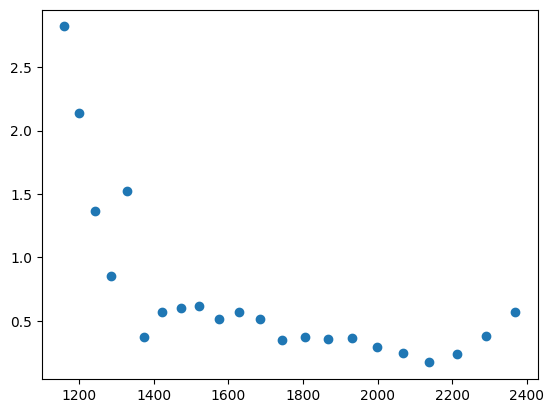

In [14]:
plt.scatter(wavelength_bins, s_res_2)